# Loading Data

In [435]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
import matplotlib.pyplot as plt
df = pd.read_csv('Breast_Cancer.csv')

In [436]:
#Displaying the First 10 rows
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [438]:
print ("The dependent features are ")
df.columns[:-1]

The dependent features are 


Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [439]:
print ("There are "+ str(df.shape[0]) +" samples in this dataset")

There are 569 samples in this dataset


In [440]:
print ("The target variable is ")
df.columns[-1]

The target variable is 


'diagnosis'

# Visualization 

<AxesSubplot:>

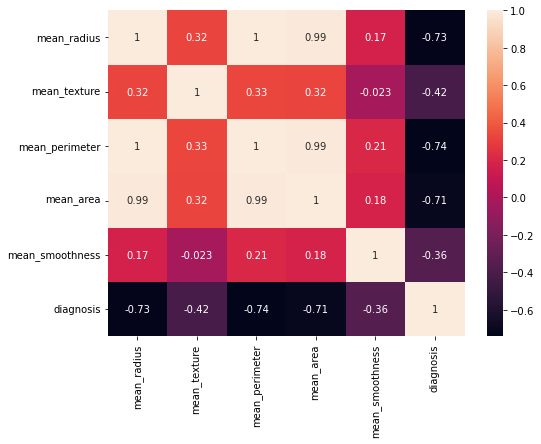

In [441]:

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)


1.List in-order the top 3 most correlated features to the diagnosis. (Mean_perimeter,Mean_radius,Mean_area)

2.What is the least correlated feature? Mean_perimeter,Mean_radius

In [442]:
#check for missing data #none found
df.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [443]:
#check for missing data #none found
df.notnull()



,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
564,True,True,True,True,True,True
565,True,True,True,True,True,True
566,True,True,True,True,True,True
567,True,True,True,True,True,True


In [444]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# Splitting Data

In [445]:
X = df[['mean_radius','mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',]]
Y = df['diagnosis']

In [446]:
#Y_test = df['diagnosis']

In [447]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [448]:
Y



0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


# Model Building/Evaluation

Explain #3

In [449]:
#datasplitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#size attempted at 0.2, 0.3,0.5,0.4,0.6

In [450]:
#X_train

In [451]:
#y_train

In [452]:
#X_test

In [453]:
#LinearRegression is 90
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8771929824561403

In [454]:
#Randomforest
clf_rf = RandomForestClassifier()

In [455]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(clf_rf,X,y,cv=5,scoring='accuracy')
print (score_rf)

[0.88596491 0.89473684 0.94736842 0.96491228 0.91150442]


In [456]:
np.mean(score_rf)

0.9208973761838223

random classifier is better than LR in this dataset. I used test size of 0.6

# ClassificationReport/Confusion Matrix

In [457]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [458]:
clf_rf.fit(X,y)

RandomForestClassifier()

In [459]:
RF_predictions = clf_rf.predict(X)
RF_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In the figure above The tumor diagnosis, 0 for benign, 1 for malignant

In [460]:
#STEP 5 PART 1
print(classification_report(Y, RF_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [461]:
#STEP 5 PART 2
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, clf_rf.predict(x))

array([[212,   0],
       [  0, 357]], dtype=int64)

SyntaxError: invalid syntax (Temp/ipykernel_31860/3364154722.py, line 3)

# 5-fold cross-validation score

In [489]:
#STEP 5 PART 3

kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [482]:

#for train_index, test_index in kf.split(X[, y, groups]):
   # print(train_index, test_index)

In [483]:

for train_index, test_index in kf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301

KeyError: "None of [Int64Index([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,\n            ...\n            559, 560, 561, 562, 563, 564, 565, 566, 567, 568],\n           dtype='int64', length=512)] are in the [columns]"

The random classifier is better at prediciting diagnosis by the features than LR